# Deep Learning for Anomaly Detection: Do or Don’t 

In [21]:
import warnings
warnings.filterwarnings('ignore')

## Libraries import

In [22]:
import pandas as pd
import numpy as np
from baycomp import SignedRankTest
from scipy.stats import wilcoxon, friedmanchisquare, rankdata
import matplotlib.pyplot as plt

## Performance comparison with Bayesian tests

### f1-score

In [23]:
performance = pd.read_excel('./metrics/F1 score.xlsx', 
                            sheet_name = 'F1 score')

In [24]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.184439,0.250000,0.411765,0.251808,0.483145,0.444118,0.407080,0.368421,0.232286
1,cardio,0.530288,0.228412,0.352941,0.176461,0.608901,0.538746,0.422222,0.211699,0.560490
2,forestcover,0.087510,0.167581,0.119716,0.064550,0.086866,0.151263,0.134596,0.142133,0.000000
3,annthyroid,0.323180,0.296651,0.179063,0.296976,0.114672,0.214889,0.193291,0.095694,0.112009
4,kaggle,0.070621,0.030787,0.112347,0.158063,0.154533,0.065441,0.029823,0.028304,0.008170
5,mammography,0.187935,0.198695,0.217544,0.219893,0.023362,0.004802,0.180223,0.003901,0.240069
6,shuttle,0.766709,0.158413,0.203523,0.047666,0.969633,0.902775,0.546060,0.005226,0.042116
7,mnist,0.347096,0.357290,0.293139,0.013103,0.381851,0.424381,0.313993,0.364384,0.024912
8,vowels,0.178622,0.418367,0.553571,0.255815,0.068010,0.125466,0.164948,0.000000,0.105893
9,seismic,0.199955,0.093240,0.194357,0.032321,0.134233,0.151402,0.148837,0.018692,0.273428


In [25]:
bayesian_prob = pd.DataFrame(columns = ['comparison','left', 'within', 'right', 'metric'])

In [26]:
# iForest vs Autoencoders
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'F1 score'}, ignore_index=True)
print(left, within, right)

0.34994 0.00806 0.642


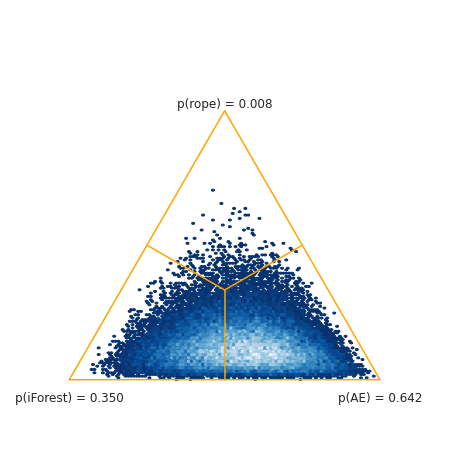

In [27]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [28]:
# Autoencoders vs DBSCAN
posterior= SignedRankTest(performance['Autoencoders'].to_numpy(), performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'Autoencoders vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'F1 score'}, ignore_index=True)
print(left, within, right)

0.57828 0.00032 0.4214


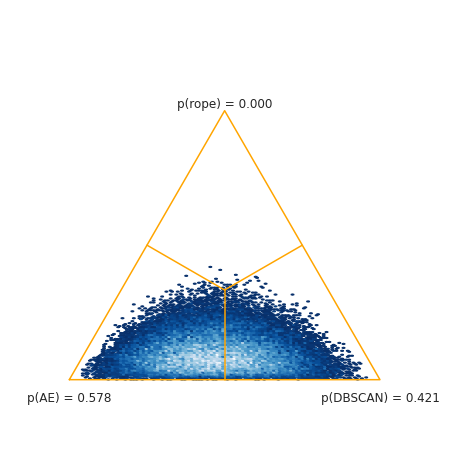

In [29]:
names = ("AE", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [30]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'F1 score'}, ignore_index=True)
print(left, within, right)

0.44598 0.0001 0.55392


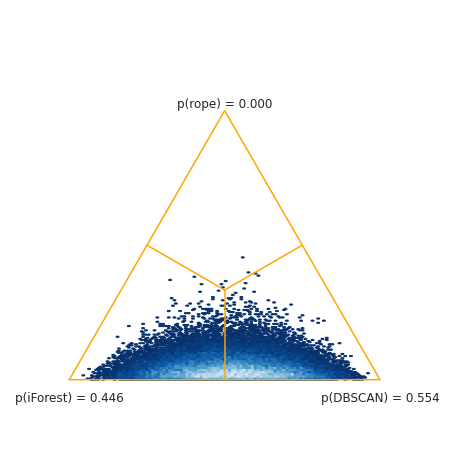

In [31]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [32]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.34994,0.00806,0.64200,F1 score
1,Autoencoders vs DBSCAN,0.57828,0.00032,0.42140,F1 score
2,iForest vs DBSCAN,0.44598,0.00010,0.55392,F1 score


### sensitivity

In [33]:
performance = pd.read_excel('./metrics/Sensitivity.xlsx', 
                            sheet_name = 'sensitivity')

In [34]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.106061,0.212121,0.318182,0.207071,0.434343,0.404040,0.348485,0.318182,0.216667
1,cardio,0.528409,0.232955,0.238636,0.130682,0.738636,0.660985,0.431818,0.215909,0.647799
2,forestcover,0.723456,0.956316,0.331999,0.183352,0.700036,0.912753,0.768111,0.811067,0.000000
3,annthyroid,0.358926,0.348315,0.121723,0.269039,0.153558,0.292759,0.226592,0.112360,0.191667
4,kaggle,0.808943,0.906504,0.841463,0.377371,0.834011,0.847561,0.878049,0.833333,0.128378
5,mammography,0.637179,0.526923,0.238462,0.285897,0.062821,0.034615,0.434615,0.026923,0.581197
6,shuttle,0.986139,0.189974,0.368556,0.025064,0.948638,0.948258,0.654230,0.006266,0.022159
7,mnist,0.570476,0.372857,0.201429,0.006667,0.529524,0.551905,0.328571,0.380000,0.034921
8,vowels,0.366667,0.820000,0.620000,0.726667,0.180000,0.353333,0.320000,0.000000,0.288889
9,seismic,0.311765,0.117647,0.364706,0.017647,0.198039,0.215686,0.188235,0.023529,0.307190


In [35]:
# Deep AE vs iForest
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['Deep Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Deep AE', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'sensitivity'}, ignore_index=True)
print(left, within, right)

0.90622 4e-05 0.09374


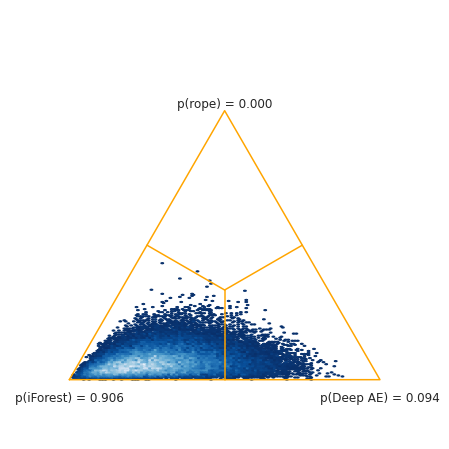

In [36]:
names = ("iForest", "Deep AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [37]:
# iForest vs Autoencoders
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'sensitivity'}, ignore_index=True)
print(left, within, right)

0.35572 0.00194 0.64234


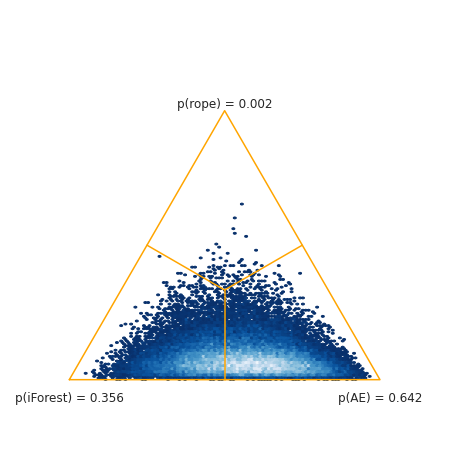

In [38]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [39]:
# Autoencoders vs Deep Autoencoders
posterior = SignedRankTest(performance['Autoencoders'].to_numpy(), performance['Deep Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'Autoencoders vs Deep AE', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'sensitivity'}, ignore_index=True)
print(left, within, right)

0.97322 0.0023 0.02448


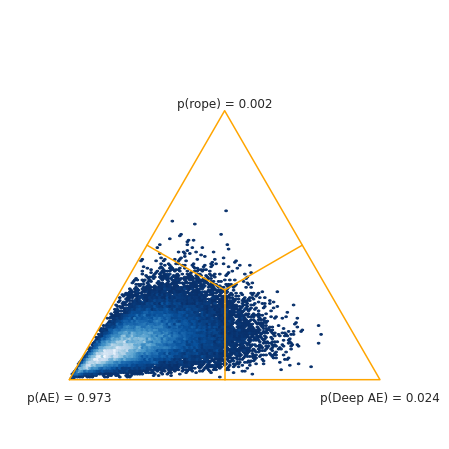

In [40]:
names = ("AE", "Deep AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [41]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.34994,0.00806,0.64200,F1 score
1,Autoencoders vs DBSCAN,0.57828,0.00032,0.42140,F1 score
2,iForest vs DBSCAN,0.44598,0.00010,0.55392,F1 score
3,iForest vs Deep AE,0.90622,0.00004,0.09374,sensitivity
4,iForest vs Autoencoders,0.35572,0.00194,0.64234,sensitivity
5,Autoencoders vs Deep AE,0.97322,0.00230,0.02448,sensitivity


### precision

In [42]:
performance = pd.read_excel('./metrics/Precision.xlsx', 
                            sheet_name = 'precision')

In [43]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.732540,0.304348,0.583333,0.329765,0.544397,0.493834,0.489362,0.437500,0.251657
1,cardio,0.533104,0.224044,0.677419,0.275255,0.517940,0.455297,0.413043,0.207650,0.494545
2,forestcover,0.046591,0.091837,0.073024,0.039170,0.046310,0.082517,0.073761,0.077891,0.000000
3,annthyroid,0.293991,0.258333,0.338542,0.331432,0.091770,0.169822,0.168524,0.083333,0.079149
4,kaggle,0.036935,0.015660,0.060192,0.099974,0.085212,0.034041,0.015169,0.014397,0.004220
5,mammography,0.110254,0.122431,0.200000,0.178659,0.014911,0.002580,0.113682,0.002103,0.151418
6,shuttle,0.628111,0.135845,0.140576,0.487609,0.991601,0.862316,0.468584,0.004482,0.423894
7,mnist,0.249458,0.342970,0.538168,0.387302,0.298598,0.344738,0.300654,0.350000,0.019367
8,vowels,0.118293,0.280822,0.500000,0.160186,0.041926,0.076296,0.111111,0.000000,0.064845
9,seismic,0.147261,0.077220,0.132479,0.195442,0.101526,0.117804,0.123077,0.015504,0.246423


In [44]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'precision'}, ignore_index=True)
print(left, within, right)

0.16282 0.0 0.83718


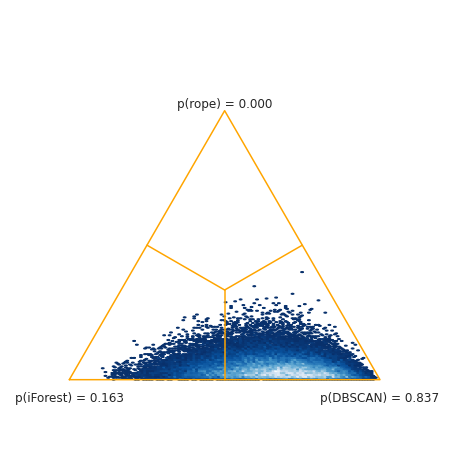

In [45]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [46]:
# DBSCAN vs CADE
posterior = SignedRankTest(performance['DBSCAN'].to_numpy(), performance['CADE'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'DBSCAN vs CADE', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'precision'}, ignore_index=True)
print(left, within, right)

0.92298 0.00046 0.07656


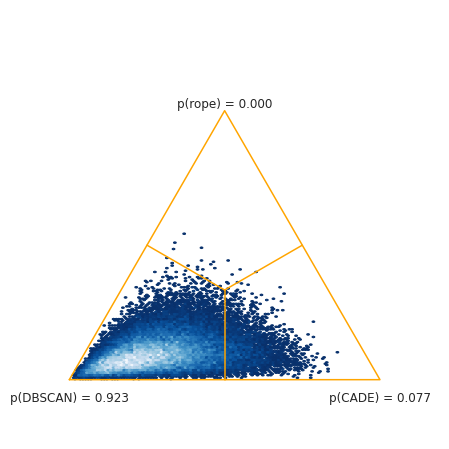

In [47]:
names = ("DBSCAN", "CADE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [48]:
#  iForest vs CADE
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['CADE'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs CADE', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'precision'}, ignore_index=True)
print(left, within, right)

0.78712 0.00012 0.21276


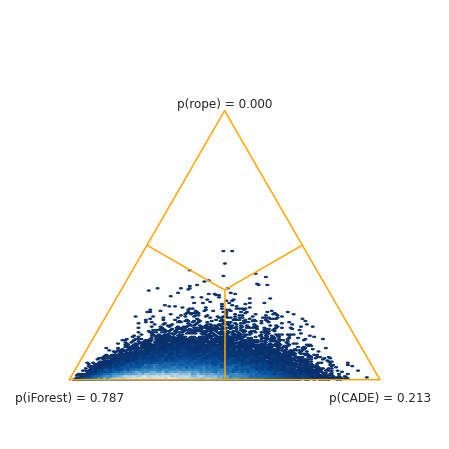

In [49]:
names = ("iForest", "CADE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [50]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.34994,0.00806,0.64200,F1 score
1,Autoencoders vs DBSCAN,0.57828,0.00032,0.42140,F1 score
2,iForest vs DBSCAN,0.44598,0.00010,0.55392,F1 score
3,iForest vs Deep AE,0.90622,0.00004,0.09374,sensitivity
4,iForest vs Autoencoders,0.35572,0.00194,0.64234,sensitivity
5,Autoencoders vs Deep AE,0.97322,0.00230,0.02448,sensitivity
6,iForest vs DBSCAN,0.16282,0.00000,0.83718,precision
7,DBSCAN vs CADE,0.92298,0.00046,0.07656,precision
8,iForest vs CADE,0.78712,0.00012,0.21276,precision


### AUC

In [51]:
performance = pd.read_excel('./metrics/AUC.xlsx', 
                            sheet_name = 'AUC')

In [52]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AUC'}, ignore_index=True)
print(left, within, right)

0.93796 0.03972 0.02232


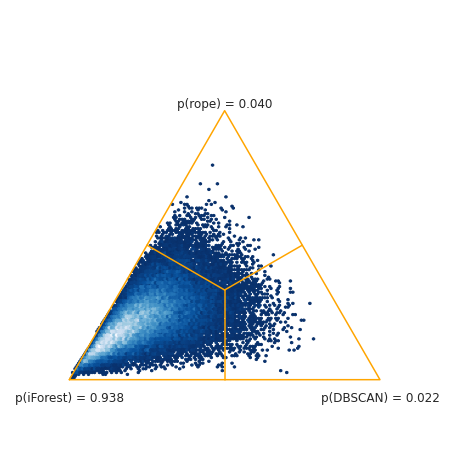

In [53]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [54]:
# iForest vs Autoencoders
posterior = SignedRankTest(performance['iForest'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AUC'}, ignore_index=True)
print(left, within, right)

0.77846 0.1083 0.11324


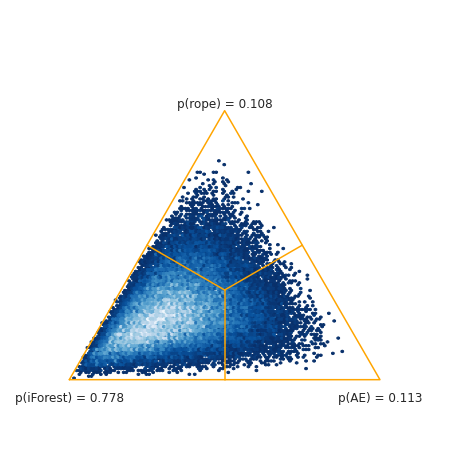

In [55]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [56]:
# DBSCAN vs Autoencoder
posterior = SignedRankTest(performance['DBSCAN'].to_numpy(),performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'DBSCAN vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AUC'}, ignore_index=True)
print(left, within, right)

0.184 0.0187 0.7973


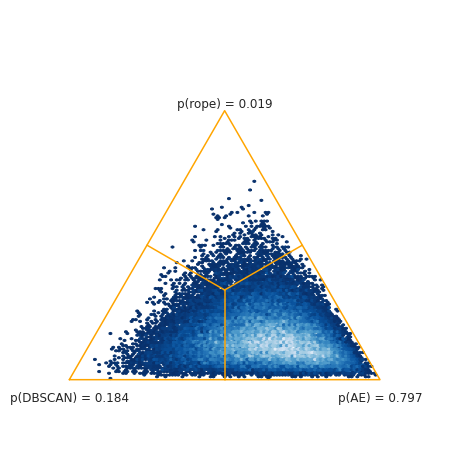

In [57]:
names = ("DBSCAN", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

### AU precision-recall

In [58]:
performance = pd.read_excel('./metrics/AUPRC.xlsx', 
                            sheet_name = 'AUPRC')

In [59]:
performance

,Dataset,iForest,LOF,DBSCAN,CADE,Deep Autoencoders,Autoencoders,OC-SVM rbf,OC-SVM linear,AnoGAN
0,arrhythmia,0.472104,0.337794,0.456049,0.274855,0.466984,0.454383,0.408949,0.363237,0.304218
1,cardio,0.591452,0.186296,0.641929,0.213197,0.676313,0.572857,0.413341,0.214435,0.572113
2,forestcover,0.071237,0.248222,0.024610,0.027988,0.054695,0.210661,0.128591,0.144711,0.004922
3,annthyroid,0.303610,0.201584,0.115129,0.238767,0.103686,0.189889,0.144098,0.086317,0.086502
4,kaggle,0.109848,0.452638,0.390416,0.066324,0.409602,0.406601,0.386689,0.549127,0.004114
5,mammography,0.215727,0.126272,0.083465,0.190945,0.031368,0.018846,0.113142,0.030144,0.230548
6,shuttle,0.980117,0.137311,0.161714,0.284125,0.956719,0.951690,0.688576,0.043863,0.832768
7,mnist,0.273280,0.313260,0.333584,0.239950,0.331863,0.339323,0.261307,0.327380,0.055710
8,vowels,0.161264,0.289336,0.047132,0.257302,0.037739,0.074476,0.164318,0.018213,0.143670
9,seismic,0.131542,0.079785,0.117427,0.138019,0.091806,0.097054,0.064502,0.041747,0.161998


In [60]:
# iForest vs DBSCAN
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['DBSCAN'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs DBSCAN', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AU precision-recall'}, ignore_index=True)
print(left, within, right)

0.8665 0.00032 0.13318


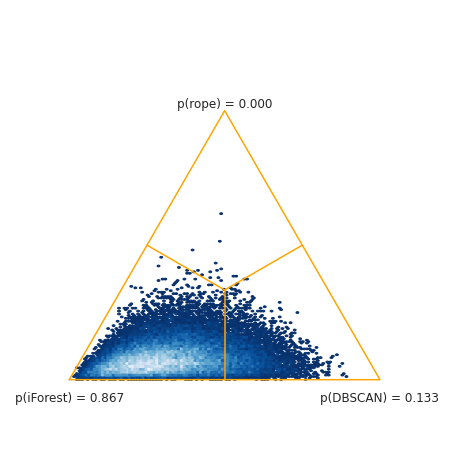

In [61]:
names = ("iForest", "DBSCAN")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [62]:
# iForest vs Autoencoder
posterior = SignedRankTest(performance['iForest'].to_numpy(),performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'iForest vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AU precision-recall'}, ignore_index=True)
print(left, within, right)

0.78932 6e-05 0.21062


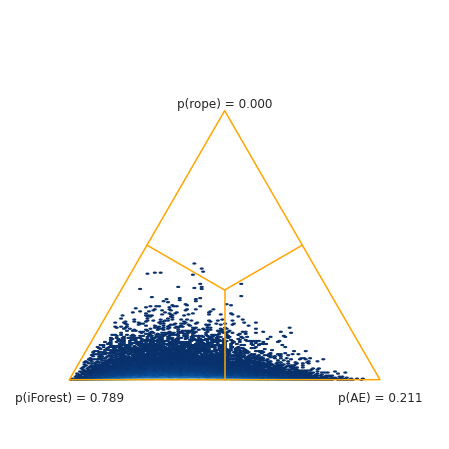

In [63]:
names = ("iForest", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [64]:
# Autoencoder vs DBSCAN
posterior = SignedRankTest(performance['DBSCAN'].to_numpy(), performance['Autoencoders'].to_numpy(), rope=0.01)
left, within, right = posterior.probs()
bayesian_prob = bayesian_prob.append({'comparison':'DBSCAN vs Autoencoders', 
                                      'left': left, 'within':within, 
                                      'right': right,'metric':'AU precision-recall'}, ignore_index=True)
print(left, within, right)

0.34724 0.025 0.62776


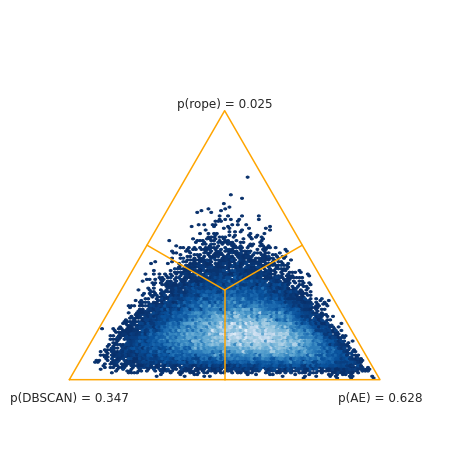

In [65]:
names = ("DBSCAN", "AE")
fig = posterior.plot(names)
fig.set_size_inches(15, 8)
plt.show()

In [66]:
bayesian_prob

,comparison,left,within,right,metric
0,iForest vs Autoencoders,0.34994,0.00806,0.64200,F1 score
1,Autoencoders vs DBSCAN,0.57828,0.00032,0.42140,F1 score
2,iForest vs DBSCAN,0.44598,0.00010,0.55392,F1 score
3,iForest vs Deep AE,0.90622,0.00004,0.09374,sensitivity
4,iForest vs Autoencoders,0.35572,0.00194,0.64234,sensitivity
5,Autoencoders vs Deep AE,0.97322,0.00230,0.02448,sensitivity
6,iForest vs DBSCAN,0.16282,0.00000,0.83718,precision
7,DBSCAN vs CADE,0.92298,0.00046,0.07656,precision
8,iForest vs CADE,0.78712,0.00012,0.21276,precision
9,iForest vs DBSCAN,0.93796,0.03972,0.02232,AUC


## Frequentist comparison

### F1 score

In [8]:
performance = pd.read_excel('./metrics/F1 score.xlsx', 
                            sheet_name = 'F1 score')

In [9]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [10]:
performances_array = performance[algorithms_names].values

In [11]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=33.15384615384619, pvalue=0.0004967915702641553)

In [12]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [13]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.9166666666666665
LOF average rank: 5.25
DBSCAN average rank: 3.9166666666666665
CADE average rank: 5.833333333333333
Deep Autoencoders average rank: 4.5
Autoencoders average rank: 3.4166666666666665
OC-SVM rbf average rank: 5.166666666666667
OC-SVM linear average rank: 6.583333333333333
AnoGAN average rank: 6.416666666666667


In [14]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
5,Autoencoders,3.416667
0,iForest,3.916667
2,DBSCAN,3.916667
4,Deep Autoencoders,4.500000
6,OC-SVM rbf,5.166667
1,LOF,5.250000
3,CADE,5.833333
8,AnoGAN,6.416667
7,OC-SVM linear,6.583333


In [15]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [16]:
wilcoxon(autoencoders, iforest, zero_method='zsplit')

WilcoxonResult(statistic=35.0, pvalue=0.791015625)

In [17]:
wilcoxon(autoencoders, lof, zero_method='zsplit')

WilcoxonResult(statistic=22.0, pvalue=0.20361328125)

In [18]:
wilcoxon(autoencoders, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=38.0, pvalue=0.9697265625)

In [19]:
wilcoxon(autoencoders, cade, zero_method='zsplit')

WilcoxonResult(statistic=16.0, pvalue=0.0771484375)

In [20]:
wilcoxon(autoencoders, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=32.0, pvalue=0.6220703125)

In [21]:
wilcoxon(autoencoders, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=16.0, pvalue=0.0771484375)

In [22]:
wilcoxon(autoencoders, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

In [23]:
wilcoxon(autoencoders, gan, zero_method='zsplit')

WilcoxonResult(statistic=16.0, pvalue=0.0771484375)

### sensitivity

In [24]:
performance = pd.read_excel('./metrics/Sensitivity.xlsx', sheet_name = 'sensitivity')

In [25]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [26]:
performances_array = performance[algorithms_names].values

In [27]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=28.487179487179503, pvalue=0.0027247623438897825)

In [28]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [29]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.375
LOF average rank: 4.666666666666667
DBSCAN average rank: 4.708333333333333
CADE average rank: 7.083333333333333
Deep Autoencoders average rank: 4.5
Autoencoders average rank: 3.125
OC-SVM rbf average rank: 4.666666666666667
OC-SVM linear average rank: 6.458333333333333
AnoGAN average rank: 6.416666666666667


In [30]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
5,Autoencoders,3.125000
0,iForest,3.375000
4,Deep Autoencoders,4.500000
1,LOF,4.666667
6,OC-SVM rbf,4.666667
2,DBSCAN,4.708333
8,AnoGAN,6.416667
7,OC-SVM linear,6.458333
3,CADE,7.083333


In [31]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [32]:
wilcoxon(autoencoders, iforest, zero_method='zsplit')

WilcoxonResult(statistic=34.5, pvalue=0.7240816609153895)

In [33]:
wilcoxon(autoencoders, lof, zero_method='zsplit')

WilcoxonResult(statistic=25.0, pvalue=0.30126953125)

In [34]:
wilcoxon(autoencoders, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=22.0, pvalue=0.20361328125)

In [35]:
wilcoxon(autoencoders, cade, zero_method='zsplit')

WilcoxonResult(statistic=9.0, pvalue=0.01611328125)

In [36]:
wilcoxon(autoencoders, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=19.0, pvalue=0.12939453125)

In [37]:
wilcoxon(autoencoders, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=13.0, pvalue=0.04248046875)

In [38]:
wilcoxon(autoencoders, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

In [39]:
wilcoxon(autoencoders, gan, zero_method='zsplit')

WilcoxonResult(statistic=11.0, pvalue=0.02685546875)

### precision

In [40]:
performance = pd.read_excel('./metrics/Precision.xlsx', sheet_name = 'precision')

In [41]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [42]:
performances_array = performance[algorithms_names].values

In [43]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=59.222222222222285, pvalue=1.2927056883273095e-08)

In [44]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [45]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.6666666666666665
LOF average rank: 5.75
DBSCAN average rank: 2.9166666666666665
CADE average rank: 4.25
Deep Autoencoders average rank: 5.333333333333333
Autoencoders average rank: 4.416666666666667
OC-SVM rbf average rank: 5.166666666666667
OC-SVM linear average rank: 6.583333333333333
AnoGAN average rank: 6.916666666666667


In [46]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
2,DBSCAN,2.916667
0,iForest,3.666667
3,CADE,4.250000
5,Autoencoders,4.416667
6,OC-SVM rbf,5.166667
4,Deep Autoencoders,5.333333
1,LOF,5.750000
7,OC-SVM linear,6.583333
8,AnoGAN,6.916667


In [47]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [48]:
wilcoxon(dbscan, iforest, zero_method='zsplit')

WilcoxonResult(statistic=27.0, pvalue=0.38037109375)

In [49]:
wilcoxon(dbscan, lof, zero_method='zsplit')

WilcoxonResult(statistic=5.0, pvalue=0.0048828125)

In [50]:
wilcoxon( dbscan, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.09228515625)

In [51]:
wilcoxon(dbscan, cade, zero_method='zsplit')

WilcoxonResult(statistic=23.0, pvalue=0.2333984375)

In [52]:
wilcoxon(dbscan, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.09228515625)

In [53]:
wilcoxon(dbscan, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=15.0, pvalue=0.06396484375)

In [54]:
wilcoxon(dbscan, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=5.0, pvalue=0.0048828125)

In [55]:
wilcoxon(dbscan, gan, zero_method='zsplit')

WilcoxonResult(statistic=13.0, pvalue=0.04248046875)

### AUC

In [56]:
performance = pd.read_excel('./metrics/AUC.xlsx', sheet_name = 'AUC')

In [57]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [58]:
performances_array = performance[algorithms_names].values

In [59]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=34.692307692307736, pvalue=0.0002784755814288244)

In [60]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [61]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 2.9166666666666665
LOF average rank: 4.75
DBSCAN average rank: 4.083333333333333
CADE average rank: 7.166666666666667
Deep Autoencoders average rank: 4.833333333333333
Autoencoders average rank: 3.4166666666666665
OC-SVM rbf average rank: 5.583333333333333
OC-SVM linear average rank: 6.416666666666667
AnoGAN average rank: 5.833333333333333


In [62]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
0,iForest,2.916667
5,Autoencoders,3.416667
2,DBSCAN,4.083333
1,LOF,4.750000
4,Deep Autoencoders,4.833333
6,OC-SVM rbf,5.583333
8,AnoGAN,5.833333
7,OC-SVM linear,6.416667
3,CADE,7.166667


In [63]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [64]:
wilcoxon(iforest, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=27.0, pvalue=0.38037109375)

In [65]:
wilcoxon(iforest, lof, zero_method='zsplit')

WilcoxonResult(statistic=17.0, pvalue=0.09228515625)

In [66]:
wilcoxon(iforest, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=22.0, pvalue=0.20361328125)

In [67]:
wilcoxon(iforest, cade, zero_method='zsplit')

WilcoxonResult(statistic=1.0, pvalue=0.0009765625)

In [68]:
wilcoxon(iforest, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=15.0, pvalue=0.06396484375)

In [69]:
wilcoxon(iforest, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=3.0, pvalue=0.00244140625)

In [70]:
wilcoxon(iforest, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=6.0, pvalue=0.0068359375)

In [71]:
wilcoxon(iforest, gan, zero_method='zsplit')

WilcoxonResult(statistic=8.0, pvalue=0.01220703125)

### Time

In [95]:
performance = pd.read_excel('./metrics/Total Time.xlsx', sheet_name = 'Total Time')

In [96]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [97]:
performances_array = performance[algorithms_names].values

In [98]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=87.2301710730949, pvalue=5.804986513677052e-14)

In [99]:
ranks = np.array([rankdata(p) for p in performances_array])

In [100]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.25
LOF average rank: 4.166666666666667
DBSCAN average rank: 3.5
CADE average rank: 4.75
Deep Autoencoders average rank: 6.25
Autoencoders average rank: 5.25
OC-SVM rbf average rank: 6.083333333333333
OC-SVM linear average rank: 3.0
AnoGAN average rank: 8.75


In [101]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by = 1)

,0,1
7,OC-SVM linear,3.000000
0,iForest,3.250000
2,DBSCAN,3.500000
1,LOF,4.166667
3,CADE,4.750000
5,Autoencoders,5.250000
6,OC-SVM rbf,6.083333
4,Deep Autoencoders,6.250000
8,AnoGAN,8.750000


In [102]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [103]:
wilcoxon(ocsvmlin, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=36.0, pvalue=0.85009765625)

In [104]:
wilcoxon(ocsvmlin, lof, zero_method='zsplit')

WilcoxonResult(statistic=29.0, pvalue=0.4697265625)

In [105]:
wilcoxon(ocsvmlin, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=31.0, pvalue=0.5693359375)

In [106]:
wilcoxon(ocsvmlin, cade, zero_method='zsplit')

WilcoxonResult(statistic=36.0, pvalue=0.85009765625)

In [107]:
wilcoxon(ocsvmlin, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=36.0, pvalue=0.85009765625)

In [108]:
wilcoxon(ocsvmlin, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

In [109]:
wilcoxon(iforest, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=30.0, pvalue=0.5185546875)

In [110]:
wilcoxon(ocsvmlin, gan, zero_method='zsplit')

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

### AU precision-recall curve

In [79]:
performance = pd.read_excel('./metrics/AUPRC.xlsx', sheet_name = 'AUPRC')

In [80]:
algorithms_names = performance.drop('Dataset', axis=1).columns

In [81]:
performances_array = performance[algorithms_names].values

In [82]:
friedmanchisquare(*performances_array)

FriedmanchisquareResult(statistic=42.0427350427351, pvalue=1.592357183758156e-05)

In [83]:
ranks = np.array([rankdata(-p) for p in performances_array])

In [84]:
average_ranks = np.mean(ranks, axis=0)
print('\n'.join('{} average rank: {}'.format(a, r) for a, r in zip(algorithms_names, average_ranks)))

iForest average rank: 3.0
LOF average rank: 5.25
DBSCAN average rank: 4.416666666666667
CADE average rank: 5.75
Deep Autoencoders average rank: 4.75
Autoencoders average rank: 4.0
OC-SVM rbf average rank: 5.416666666666667
OC-SVM linear average rank: 6.083333333333333
AnoGAN average rank: 6.333333333333333


In [85]:
ranks = {a:r for a, r in zip(algorithms_names, average_ranks)}
pd.DataFrame(ranks.items()).sort_values(by=1)

,0,1
0,iForest,3.000000
5,Autoencoders,4.000000
2,DBSCAN,4.416667
4,Deep Autoencoders,4.750000
1,LOF,5.250000
6,OC-SVM rbf,5.416667
3,CADE,5.750000
7,OC-SVM linear,6.083333
8,AnoGAN,6.333333


In [86]:
autoencoders = np.array(performance['Autoencoders'])
iforest = np.array(performance['iForest'])
lof = np.array(performance['LOF'])
dbscan = np.array(performance['DBSCAN'])
cade = np.array(performance['CADE'])
deepautoencoders = np.array(performance['Deep Autoencoders'])
ocsvmrbf = np.array(performance['OC-SVM rbf'])
ocsvmlin = np.array(performance['OC-SVM linear'])
gan = np.array(performance['AnoGAN'])

In [87]:
wilcoxon(iforest, autoencoders, zero_method='zsplit')

WilcoxonResult(statistic=29.0, pvalue=0.4697265625)

In [88]:
wilcoxon(iforest, lof, zero_method='zsplit')

WilcoxonResult(statistic=24.0, pvalue=0.26611328125)

In [89]:
wilcoxon(iforest, dbscan, zero_method='zsplit')

WilcoxonResult(statistic=26.0, pvalue=0.33935546875)

In [90]:
wilcoxon(iforest, cade, zero_method='zsplit')

WilcoxonResult(statistic=8.0, pvalue=0.01220703125)

In [91]:
wilcoxon(iforest, deepautoencoders, zero_method='zsplit')

WilcoxonResult(statistic=23.0, pvalue=0.2333984375)

In [92]:
wilcoxon(iforest, ocsvmrbf, zero_method='zsplit')

WilcoxonResult(statistic=14.0, pvalue=0.05224609375)

In [93]:
wilcoxon(iforest, ocsvmlin, zero_method='zsplit')

WilcoxonResult(statistic=16.0, pvalue=0.0771484375)

In [94]:
wilcoxon(iforest, gan, zero_method='zsplit')

WilcoxonResult(statistic=5.0, pvalue=0.0048828125)